In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 1 Hipotesis 
Mantener el dinero en depósitos bancarios ha resultado en una pérdida de poder adquisitivo debido a la inflación


In [95]:
df_fed = pd.read_csv("FED_info.csv")

#creamos la columna fecha
df_fed["Date"] = pd.to_datetime(df_fed[["Year", "Month", "Day"]])

#filtramos desde 2010
df_fed = df_fed[df_fed["Date"].dt.year >= 2010]

df_fed["YearMonth"] = df_fed["Date"].dt.to_period("M")

#obtenemos el ultimo valor de cada mes para que sea mas preciso
df_fed_mensual = df_fed.groupby("YearMonth").tail(1).reset_index(drop=True)

df_fed_mensual["Date"] = df_fed_mensual["YearMonth"].dt.to_timestamp()

#seleccionamos las columnas que nos interesa y creamos la columna de fecha
columnas_deseadas = ["Date",
    "Effective Federal Funds Rate",
    "Real GDP (Percent Change)",
    "Unemployment Rate",
    "Inflation Rate"]

df_fed_mensual = df_fed_mensual[columnas_deseadas]

#le damos la vuelta porque queremos los datos ascendentes
df_fed_mensual = df_fed_mensual.sort_values("Date").reset_index(drop=True)


In [96]:
cpi = pd.read_csv("CPI_database.csv")

#renombramos las columnas para aclararnos mejor 
cpi.columns = ["Date", "CPI"]

cpi["Date"] = pd.to_datetime(cpi["Date"])

#filtramos desde donde queremos los datos
cpi = cpi[cpi["Date"].dt.year >= 2010]

cpi["YearMonth"] = cpi["Date"].dt.to_period("M")

#obtnemos el ultimo valor de cada mes para que sea mas preciso
cpi_mensual = cpi.groupby("YearMonth").tail(1).reset_index(drop=True)

cpi_mensual["Date"] = cpi_mensual["YearMonth"].dt.to_timestamp()

#cogemos las dos columnas que nos interesan
cpi_mensual = cpi_mensual[["Date", "CPI"]]

In [97]:
df_principal = pd.merge(cpi_mensual, df_fed_mensual, on="Date", how="inner")
df_principal

,Date,CPI,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,2010-01-01,216.687,0.11,1.7,9.8,1.6
1,2010-02-01,216.741,0.13,NaN,9.8,1.3
2,2010-03-01,217.631,0.16,NaN,9.9,1.1
3,2010-04-01,218.009,0.20,3.9,9.9,0.9
4,2010-05-01,218.178,0.20,NaN,9.6,0.9
...,...,...,...,...,...,...
82,2016-11-01,241.353,0.41,NaN,4.6,2.1
83,2016-12-01,241.432,NaN,NaN,NaN,NaN
84,2017-01-01,242.839,0.65,NaN,4.8,2.3
85,2017-02-01,243.603,0.66,NaN,4.7,2.2


C:\Users\paumo\AppData\Local\Temp\ipykernel_12820\3513491227.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cpi_mensual["CPI"] = cpi_mensual["CPI"].fillna(method="ffill")


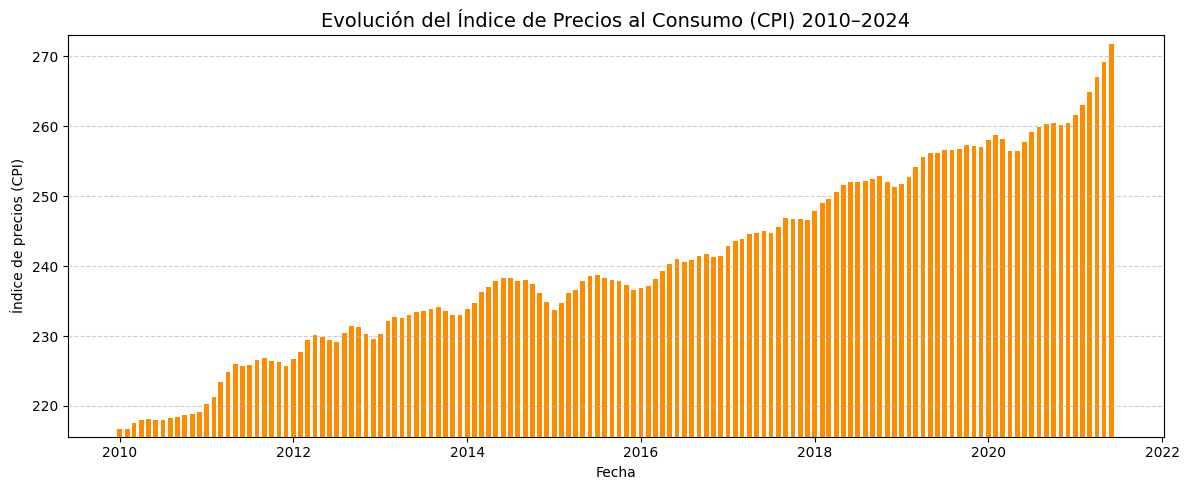

In [ ]:
cpi_mensual["CPI"] = cpi_mensual["CPI"].fillna(method="ffill")

#obtenemos los valores maximos y minimos para ajustar el grafico
cpi_min = cpi_mensual["CPI"].min()
cpi_max = cpi_mensual["CPI"].max()

#creamos el grafico ajustado
plt.figure(figsize=(12, 5))
plt.bar(cpi_mensual["Date"], cpi_mensual["CPI"], color="darkorange", width=20)

plt.title("Evolución del Índice de Precios al Consumo (CPI) 2010–2024", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Índice de precios (CPI)")
plt.ylim(cpi_min * 0.995, cpi_max * 1.005) 
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


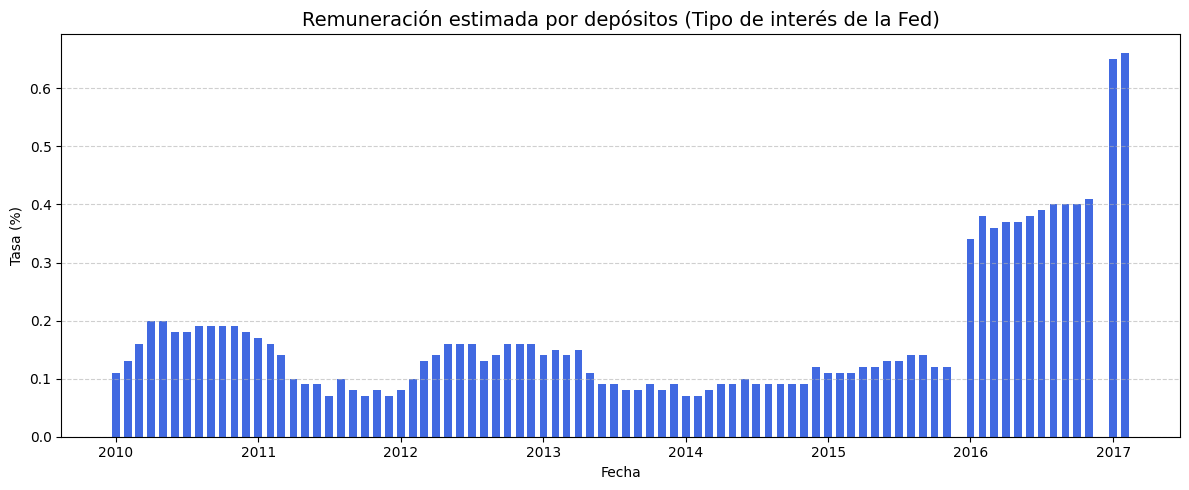

In [99]:
plt.figure(figsize=(12, 5))
plt.bar(df_fed_mensual["Date"], df_fed_mensual["Effective Federal Funds Rate"], color="royalblue", width=20)
plt.title("Remuneración estimada por depósitos (Tipo de interés de la Fed)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Tasa (%)")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


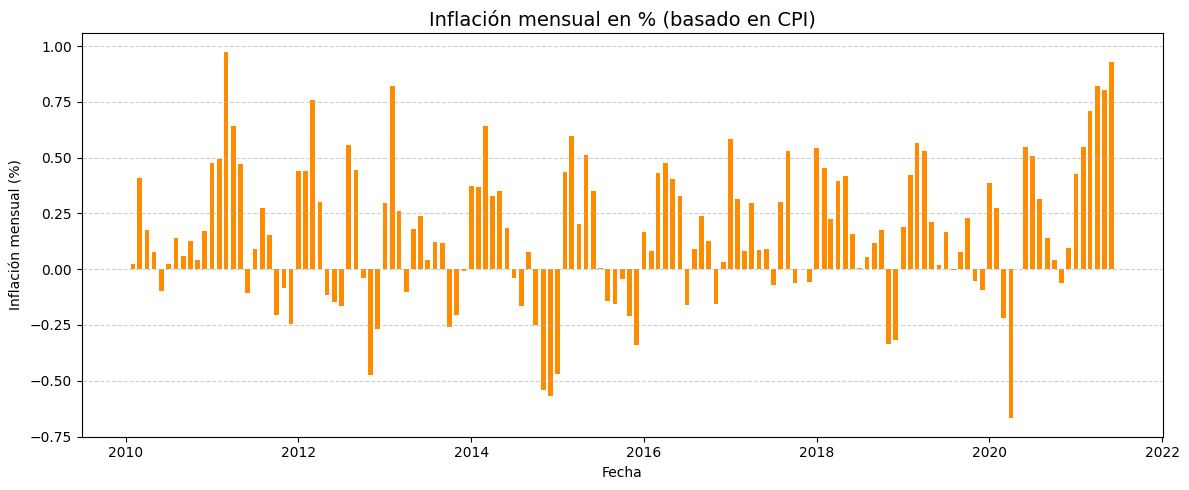

In [100]:
cpi_mensual["Inflacion_mensual_%"] = cpi_mensual["CPI"].pct_change() * 100

plt.figure(figsize=(12, 5))
plt.bar(cpi_mensual["Date"], cpi_mensual["Inflacion_mensual_%"], color="darkorange", width=20)
plt.title("Inflación mensual en % (basado en CPI)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Inflación mensual (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


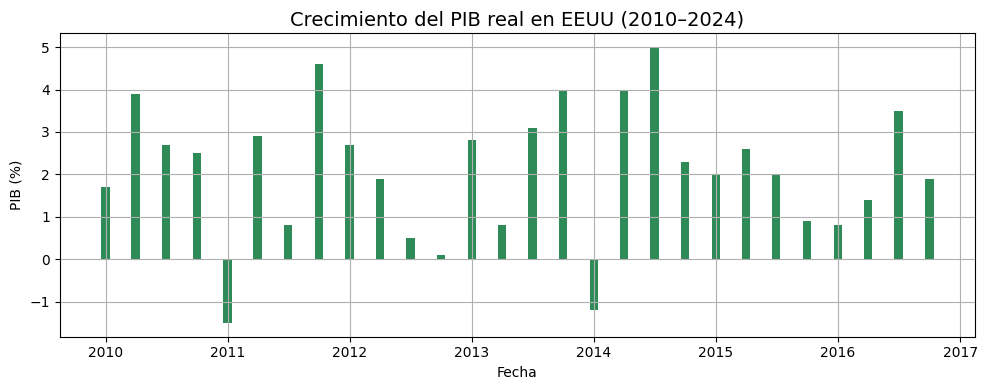

In [139]:
plt.figure(figsize=(10, 4))
plt.bar(df_fed_mensual["Date"], df_fed_mensual["Real GDP (Percent Change)"], color="seagreen", width=25)
plt.title("Crecimiento del PIB real en EEUU (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("PIB (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


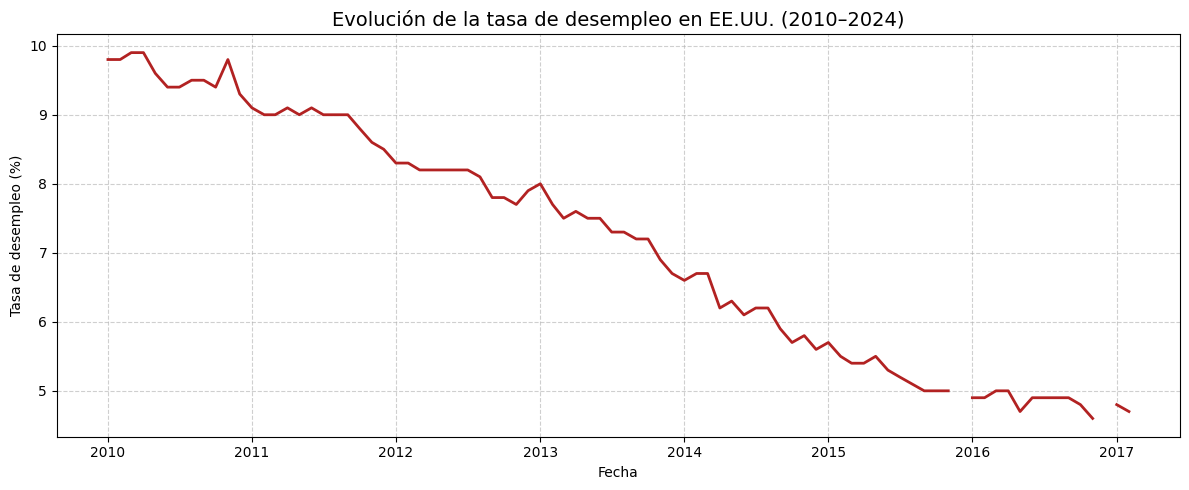

In [102]:
plt.figure(figsize=(12, 5))
plt.plot(df_fed_mensual["Date"], df_fed_mensual["Unemployment Rate"], color="firebrick", linewidth=2)
plt.title("Evolución de la tasa de desempleo en EE.UU. (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Tasa de desempleo (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2 Hipotesis 
Los ETFs han ofrecido una rentabilidad superior al de los bonos y metales preciosos.

In [103]:
# DATASET DE ETFs DE BONOS

df_2 = pd.read_csv("ETFs_(bonds)_Market_Dataset.csv", sep = ";")

df_2["Date"] = pd.to_datetime(df_2["Date"], format="%d.%m.%Y")
df_2 = df_2[df_2["Date"].dt.year >= 2010]

#ordenamos por orden de fecha por si acaso
df_2 = df_2.sort_values("Date")

#creamos la columna de la fecha 
df_2["YearMonth"] = df_2["Date"].dt.to_period("M")

#extraemos el ultimo precio de cada mes 
df_monthly = df_2.groupby("YearMonth").tail(1).reset_index(drop=True)

#seleccionamos solo las dos columnas que nos interesan
df_monthly = df_monthly[["YearMonth", "PX_LAST"]]


In [104]:
# DATASET DE METALES PRECIADOS

df_metales = pd.read_csv("Metales_preciados_1990-2024.csv")

#limpiamos las columnas y convertimos fechas
df_metales.columns = df_metales.columns.str.strip()
df_metales["Date"] = pd.to_datetime(df_metales["Date"])

#filtrmaos desde 2010
df_metales = df_metales[df_metales["Date"].dt.year >= 2010]

#seleccionamos solo las columnas que nos interesan
cols = ["Gold AM Fix", "Silver Fix", "Platinum AM Fix", "Palladium AM Fix"]

for col in cols:
    df_metales[col] = pd.to_numeric(df_metales[col], errors="coerce")

#convertimos las fechas
df_metales["YearMonth"] = df_metales["Date"].dt.to_period("M")

#agrupamos por mes calculando sus respectivas medias
df_mensual = df_metales.groupby("YearMonth")[cols].mean().reset_index()

df_mensual["Date"] = df_mensual["YearMonth"].dt.to_timestamp()

#renombramos la columnas por semplicidad
df_mensual.rename(columns={
    "Gold AM Fix": "Gold",
    "Silver Fix": "Silver",
    "Platinum AM Fix": "Platinum",
    "Palladium AM Fix": "Palladium"
}, inplace=True)

#ponemos las columnas en el ordem que queremos
df_mensual = df_mensual[["Date", "Gold", "Silver", "Platinum", "Palladium"]]

In [105]:
# DATASET DE BONOS DEL GOBIERNO A 10 AÑOS

df_bonos = pd.read_csv("US10year_bondyield_1962-2023.csv")

df_bonos["Date"] = pd.to_datetime(df_bonos["Date"])

#filtramos desde 2010
df_bonos = df_bonos[df_bonos["Date"].dt.year >= 2010]

df_bonos["YearMonth"] = df_bonos["Date"].dt.to_period("M")

#obtenemos el último valor de cada mes
df_bonos_mensual = df_bonos.groupby("YearMonth").tail(1).reset_index(drop=True)

df_bonos_mensual["Date"] = df_bonos_mensual["YearMonth"].dt.to_timestamp()

#seleccionamos solo las columnas que nos interesan
df_bonos_mensual = df_bonos_mensual[["Date", "Adj Close"]]
df_bonos_mensual.rename(columns={"Adj Close": "US10Y_Bond"}, inplace=True)

# Ordenamos cronológicamente
df_bonos_mensual = df_bonos_mensual.sort_values("Date").reset_index(drop=True)

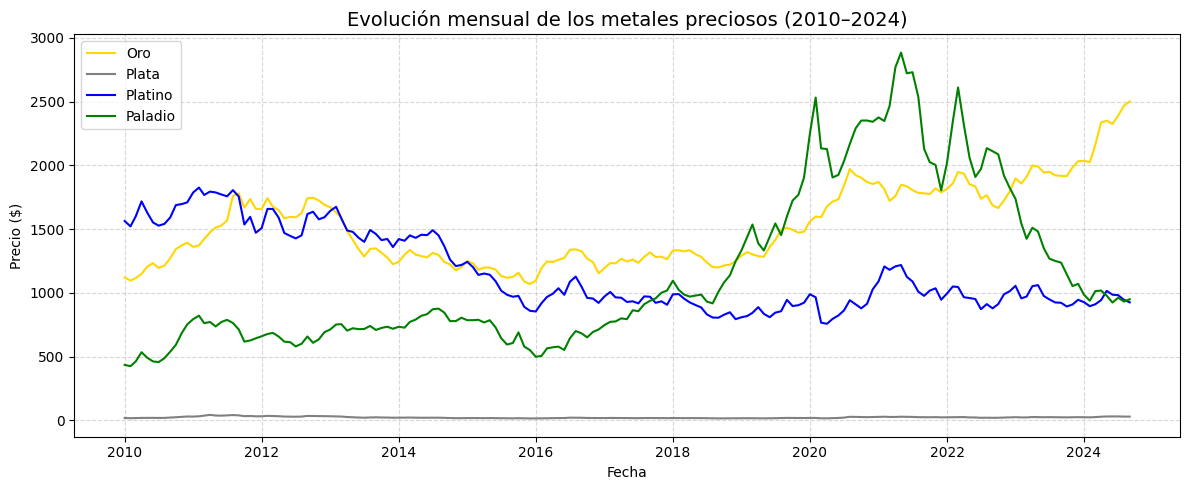

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(df_mensual["Date"], df_mensual["Gold"], label="Oro", color="gold")
plt.plot(df_mensual["Date"], df_mensual["Silver"], label="Plata", color="gray")
plt.plot(df_mensual["Date"], df_mensual["Platinum"], label="Platino", color="blue")
plt.plot(df_mensual["Date"], df_mensual["Palladium"], label="Paladio", color="green")

plt.title("Evolución mensual de los metales preciosos (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [107]:
df_bonos_mensual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        161 non-null    datetime64[ns]
 1   US10Y_Bond  136 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


C:\Users\paumo\AppData\Local\Temp\ipykernel_12820\1853194449.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bonos_mensual["US10Y_Bond"] = df_bonos_mensual["US10Y_Bond"].fillna(method="ffill")


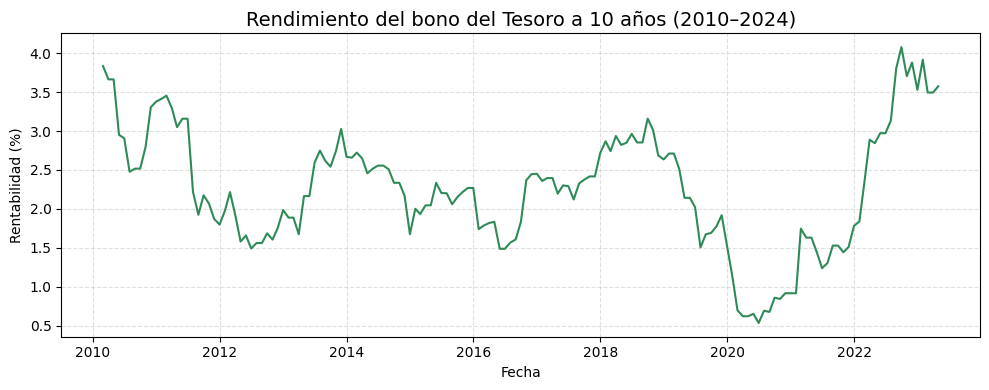

In [140]:
import matplotlib.pyplot as plt

#rellenamos los Nans con el valor anterior para que no quede vacio
df_bonos_mensual["US10Y_Bond"] = df_bonos_mensual["US10Y_Bond"].fillna(method="ffill")

plt.figure(figsize=(10, 4))
plt.plot(df_bonos_mensual["Date"], df_bonos_mensual["US10Y_Bond"], color="seagreen")
plt.title("Rendimiento del bono del Tesoro a 10 años (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad (%)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



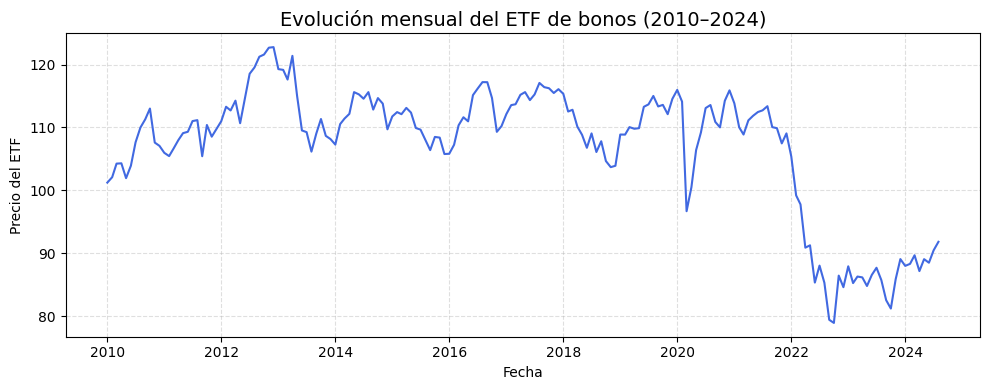

In [143]:
plt.figure(figsize=(10, 4))
plt.plot(df_monthly["Date"], df_monthly["PX_LAST"], color="royalblue")
plt.title("Evolución mensual del ETF de bonos (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio del ETF")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# 3 HIPOTESIS
El S&P 500 ha sido uno de los activos más rentables y consistentes a largo plazo, con una volatilidad moderada gracias a su diversificación

In [119]:
df_sp = pd.read_csv("SP500_Stock_Price_by_Ticker_06.08.2024(10years).csv")


df_sp["Date"] = pd.to_datetime(df_sp["Date"])

#filtramos desde 2010
df_sp = df_sp[df_sp["Date"].dt.year >= 2010]

#seleccionamos solo 4 acciones que representen un poco el rendimiento del SP500
acciones = ["AAPL", "MSFT", "JPM", "GOOG"]

df_sp["YearMonth"] = df_sp["Date"].dt.to_period("M")

#seleccionamos solo las columnas que nos interesan
df_filtered = df_sp[["Date", "YearMonth"] + acciones]

#obtenemos solo el último valor disponible de cada mes
df_mensual_sp = df_filtered.groupby("YearMonth").tail(1).reset_index(drop=True)

df_mensual_sp["Date"] = df_mensual_sp["YearMonth"].dt.to_timestamp()

#ordenamos por orden cronologico
df_mensual_sp = df_mensual_sp.sort_values("Date").reset_index(drop=True)

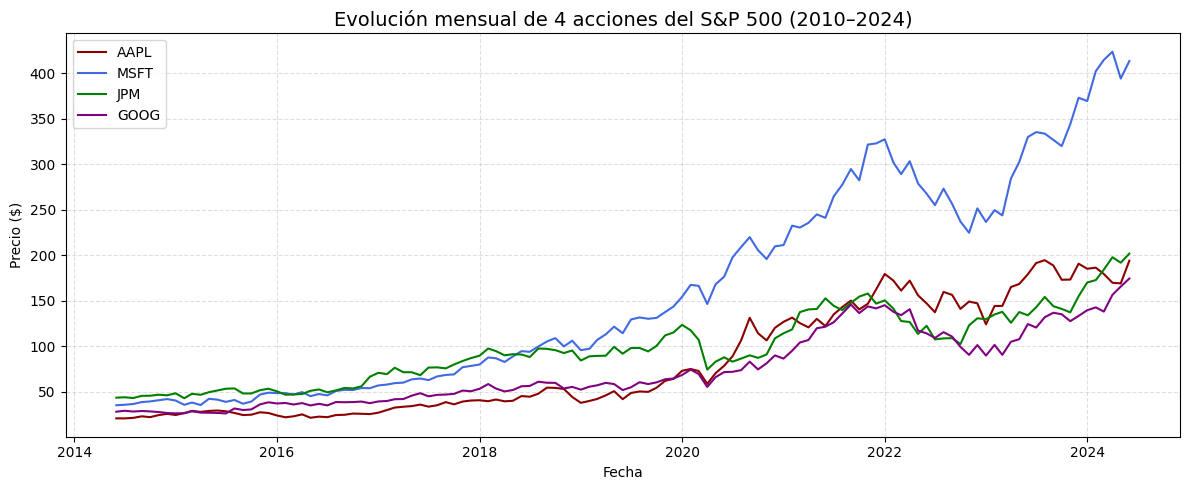

In [118]:
plt.figure(figsize=(12, 5))
plt.plot(df_mensual_sp["Date"], df_mensual_sp["AAPL"], label="AAPL", color="darkred")
plt.plot(df_mensual_sp["Date"], df_mensual_sp["MSFT"], label="MSFT", color="royalblue")
plt.plot(df_mensual_sp["Date"], df_mensual_sp["JPM"], label="JPM", color="green")
plt.plot(df_mensual_sp["Date"], df_mensual_sp["GOOG"], label="GOOG", color="purple")

plt.title("Evolución mensual de 4 acciones del S&P 500 (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\paumo\AppData\Local\Temp\ipykernel_12820\1965624356.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mensual_sp.fillna(method="ffill", inplace=True)


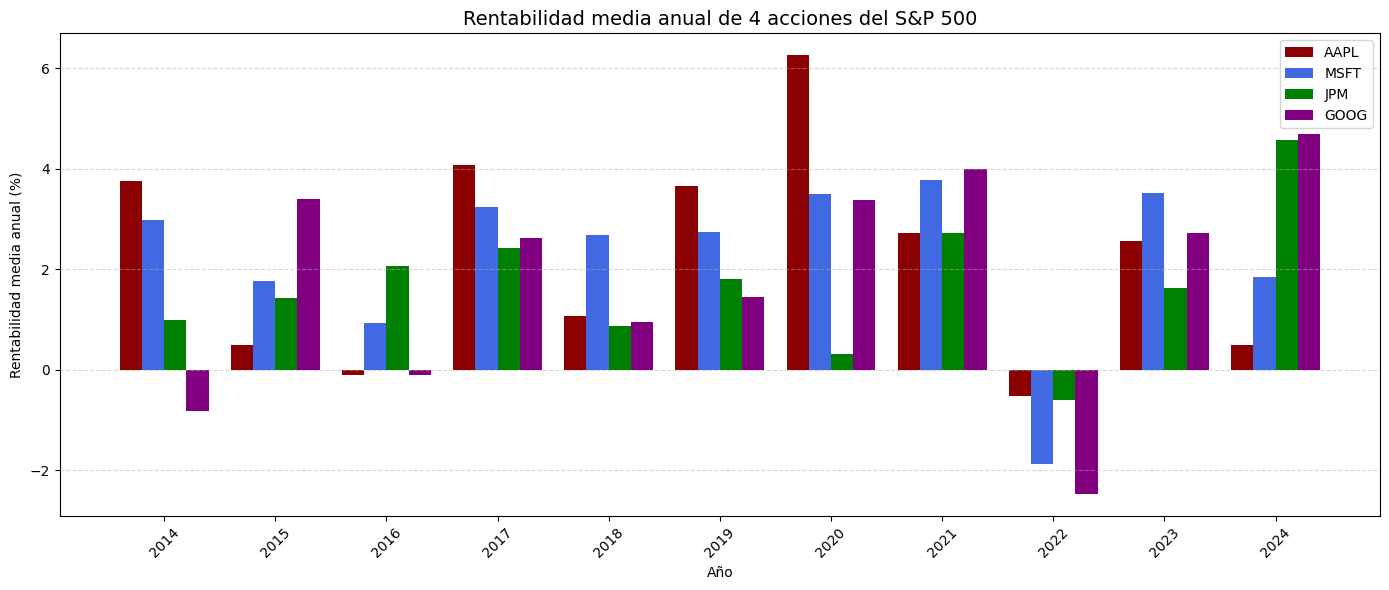

In [144]:
df_sp = pd.read_csv("SP500_Stock_Price_by_Ticker_06.08.2024(10years).csv")

df_sp["Date"] = pd.to_datetime(df_sp["Date"])
df_sp = df_sp[df_sp["Date"].dt.year >= 2010]

#seleccionamos las 4 acciones que nos interesan
acciones = ["AAPL", "MSFT", "JPM", "GOOG"]
df_sp["YearMonth"] = df_sp["Date"].dt.to_period("M")
df_filtered = df_sp[["Date", "YearMonth"] + acciones]

#tomamos el último valor de cada mes como referencia
df_mensual_sp = df_filtered.groupby("YearMonth").tail(1).reset_index(drop=True)
df_mensual_sp["Date"] = df_mensual_sp["YearMonth"].dt.to_timestamp()
df_mensual_sp = df_mensual_sp.sort_values("Date").reset_index(drop=True)

#calculamos la rentabilidad mensual de cada acción
for col in acciones:
    df_mensual_sp[f"{col}_ret"] = df_mensual_sp[col].pct_change() * 100

df_mensual_sp.fillna(method="ffill", inplace=True)

#agrupamos por año y calculamos la rentabilidad media anual
df_mensual_sp["Year"] = df_mensual_sp["Date"].dt.year
df_anual = df_mensual_sp.groupby("Year")[[f"{col}_ret" for col in acciones]].mean().reset_index()

x = np.arange(len(df_anual["Year"]))
bar_width = 0.2

plt.figure(figsize=(14, 6))
plt.bar(x, df_anual["AAPL_ret"], width=bar_width, label="AAPL", color="darkred")
plt.bar(x + bar_width, df_anual["MSFT_ret"], width=bar_width, label="MSFT", color="royalblue")
plt.bar(x + 2 * bar_width, df_anual["JPM_ret"], width=bar_width, label="JPM", color="green")
plt.bar(x + 3 * bar_width, df_anual["GOOG_ret"], width=bar_width, label="GOOG", color="purple")

plt.title("Rentabilidad media anual de 4 acciones del S&P 500", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Rentabilidad media anual (%)")
plt.xticks(x + 1.5 * bar_width, df_anual["Year"], rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


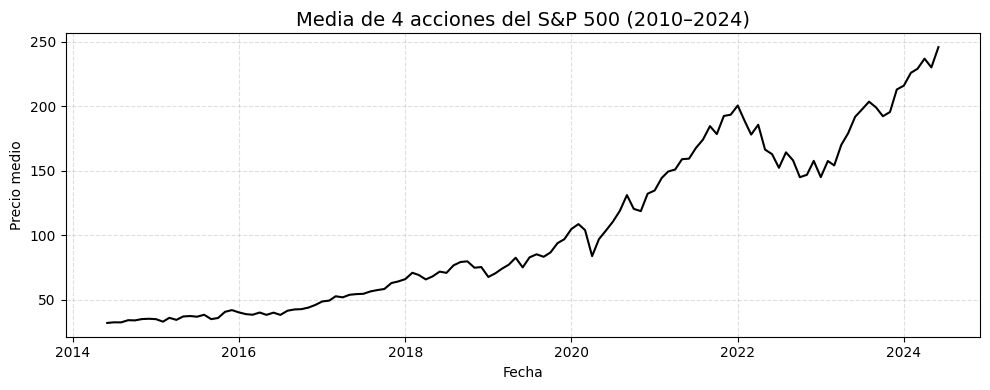

In [121]:
df_mensual_sp["SP500_proxy"] = df_mensual_sp[["AAPL", "MSFT", "JPM", "GOOG"]].mean(axis=1)

plt.figure(figsize=(10, 4))
plt.plot(df_mensual_sp["Date"], df_mensual_sp["SP500_proxy"], label="S&P 500 (proxy)", color="black")
plt.title("Media de 4 acciones del S&P 500 (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio medio")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# 4 HIPOTESIS
El oro y la plata han funcionado como activos refugio durante periodos de incertidumbre, pero con rentabilidad moderada

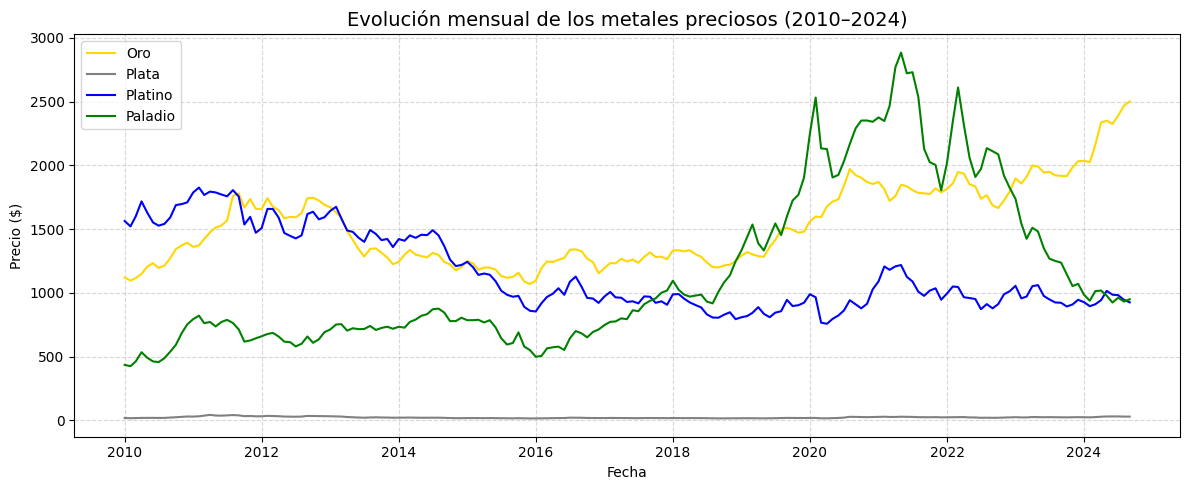

In [127]:
#COPIAMOS LA MISMA GRAFICA QUE ANTES

plt.figure(figsize=(12, 5))

plt.plot(df_mensual["Date"], df_mensual["Gold"], label="Oro", color="gold")
plt.plot(df_mensual["Date"], df_mensual["Silver"], label="Plata", color="gray")
plt.plot(df_mensual["Date"], df_mensual["Platinum"], label="Platino", color="blue")
plt.plot(df_mensual["Date"], df_mensual["Palladium"], label="Paladio", color="green")

plt.title("Evolución mensual de los metales preciosos (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\paumo\AppData\Local\Temp\ipykernel_12820\1186600019.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mensual_metales.fillna(method="ffill", inplace=True)


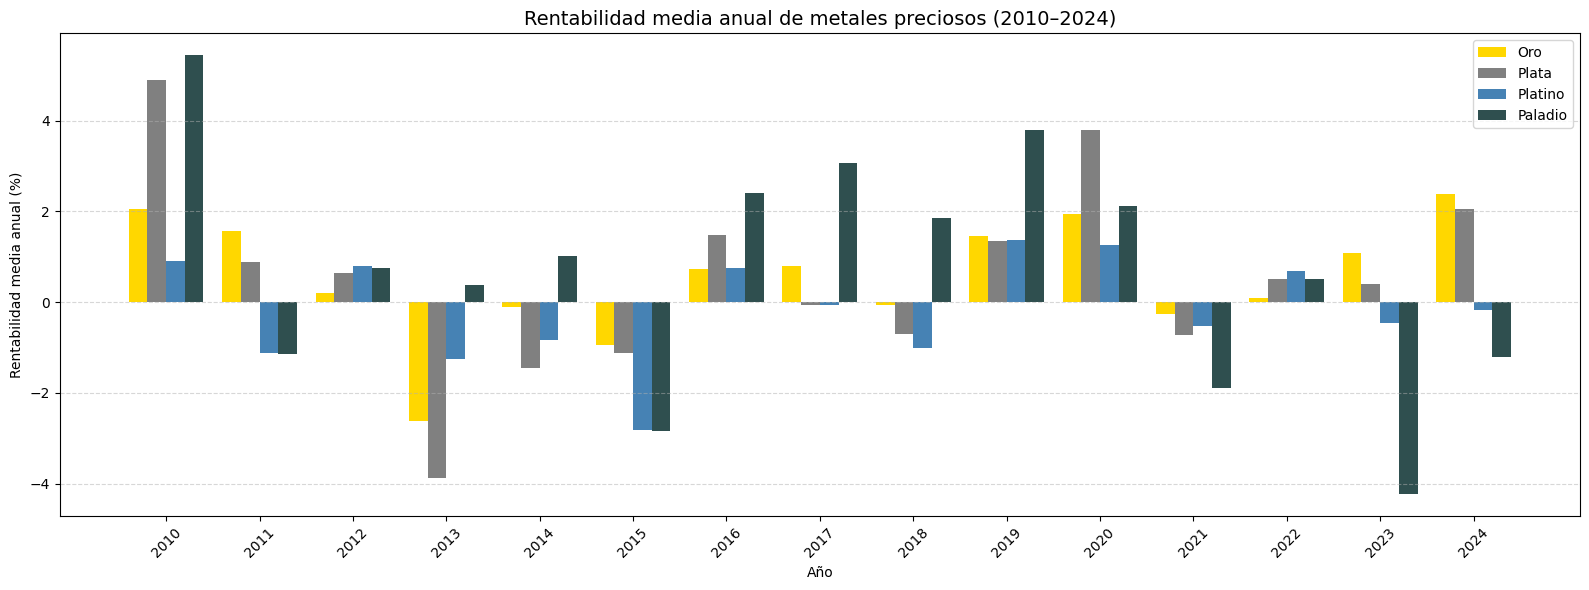

In [145]:
df_metales = pd.read_csv("Metales_preciados_1990-2024.csv")

df_metales.columns = df_metales.columns.str.strip()
df_metales["Date"] = pd.to_datetime(df_metales["Date"])

#filtramos desde 2010
df_metales = df_metales[df_metales["Date"].dt.year >= 2010]

cols = ["Gold AM Fix", "Silver Fix", "Platinum AM Fix", "Palladium AM Fix"]
df_metales = df_metales[["Date"] + cols]

for col in cols:
    df_metales[col] = pd.to_numeric(df_metales[col], errors="coerce")

df_metales["YearMonth"] = df_metales["Date"].dt.to_period("M")

#agrupamos por mes y calculamos la media
df_mensual_metales = df_metales.groupby("YearMonth")[cols].mean().reset_index()
df_mensual_metales["Date"] = df_mensual_metales["YearMonth"].dt.to_timestamp()

#renombramos las columnas para no confundirnos
df_mensual_metales.rename(columns={
    "Gold AM Fix": "Gold",
    "Silver Fix": "Silver",
    "Platinum AM Fix": "Platinum",
    "Palladium AM Fix": "Palladium"
}, inplace=True)

#calculamos la rentabilidad mensual 
for col in ["Gold", "Silver", "Platinum", "Palladium"]:
    df_mensual_metales[f"{col}_ret"] = df_mensual_metales[col].pct_change() * 100

df_mensual_metales.fillna(method="ffill", inplace=True)

#creamos la columna de año
df_mensual_metales["Year"] = df_mensual_metales["Date"].dt.year

# agrupamos por año y calculamos la media anual de rentabilidad
df_anual_metales = df_mensual_metales.groupby("Year")[
    [f"{col}_ret" for col in ["Gold", "Silver", "Platinum", "Palladium"]]
].mean().reset_index()


x = np.arange(len(df_anual_metales["Year"]))
bar_width = 0.2

plt.figure(figsize=(16, 6))
plt.bar(x, df_anual_metales["Gold_ret"], width=bar_width, label="Oro", color="gold")
plt.bar(x + bar_width, df_anual_metales["Silver_ret"], width=bar_width, label="Plata", color="gray")
plt.bar(x + 2 * bar_width, df_anual_metales["Platinum_ret"], width=bar_width, label="Platino", color="steelblue")
plt.bar(x + 3 * bar_width, df_anual_metales["Palladium_ret"], width=bar_width, label="Paladio", color="darkslategray")

plt.title("Rentabilidad media anual de metales preciosos (2010–2024)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Rentabilidad media anual (%)")
plt.xticks(x + 1.5 * bar_width, df_anual_metales["Year"], rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 5 HIPOTESIS 
Los bonos del Tesoro a 10 años han ofrecido rentabilidades inferiores a la inflación en muchos periodos

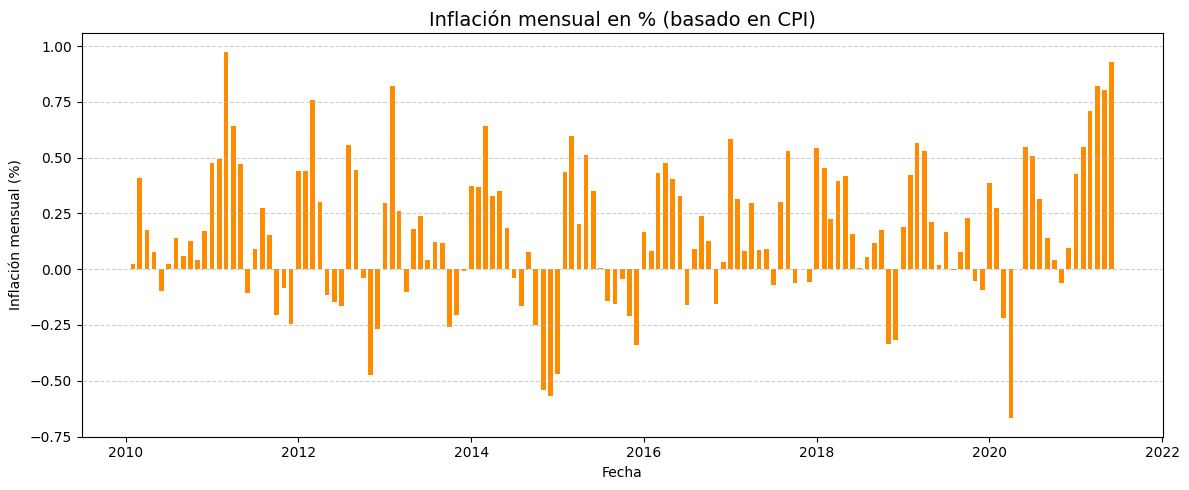

In [ ]:
# VOLVEMOS A USAR EL DATASET DE LA INFLACION

cpi_mensual["Inflacion_mensual_%"] = cpi_mensual["CPI"].pct_change() * 100

plt.figure(figsize=(12, 5))
plt.bar(cpi_mensual["Date"], cpi_mensual["Inflacion_mensual_%"], color="darkorange", width=20)
plt.title("Inflación mensual en % (basado en CPI)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Inflación mensual (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\paumo\AppData\Local\Temp\ipykernel_12820\1839109675.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bonos_mensual["US10Y_Bond"] = df_bonos_mensual["US10Y_Bond"].fillna(method="ffill")


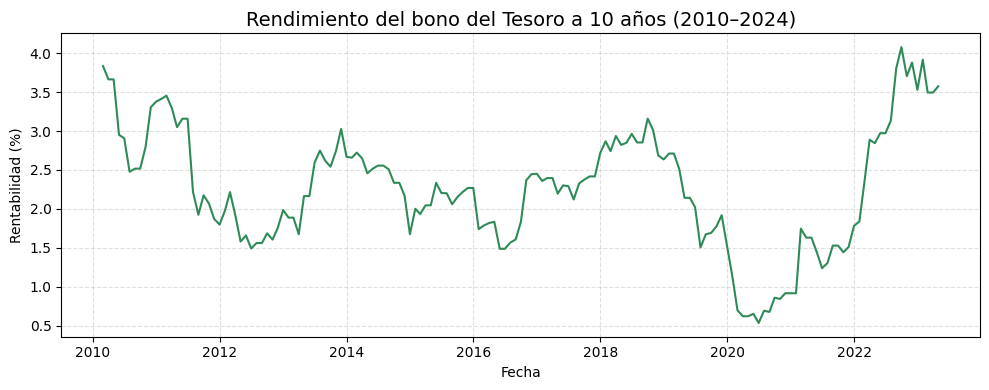

In [ ]:
#VOLVEMOS A COGER EL DATASET DE LOS BONOS DEL GOBIERNO A 10 AÑOS

#rellenamos los Nans con el valor anterior
df_bonos_mensual["US10Y_Bond"] = df_bonos_mensual["US10Y_Bond"].fillna(method="ffill")

plt.figure(figsize=(10, 4))
plt.plot(df_bonos_mensual["Date"], df_bonos_mensual["US10Y_Bond"], color="seagreen")
plt.title("Rendimiento del bono del Tesoro a 10 años (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad (%)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

C:\Users\paumo\AppData\Local\Temp\ipykernel_12820\303142239.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bonos_mensual["US10Y_Bond"] = df_bonos_mensual["US10Y_Bond"].fillna(method="ffill")


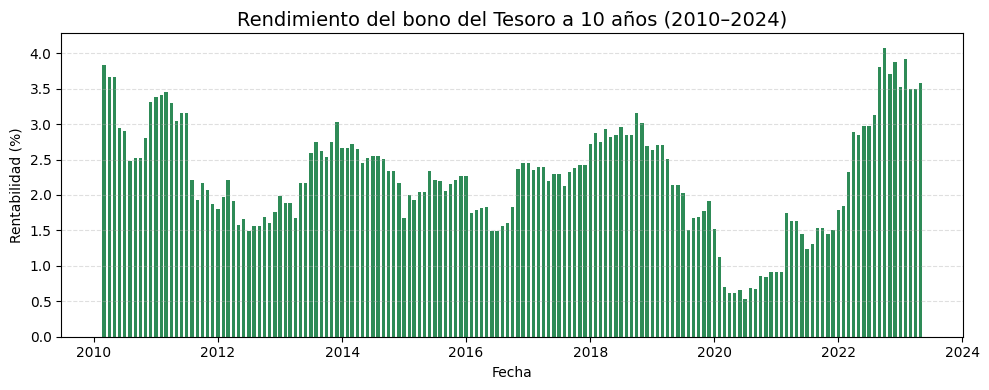

In [146]:
#rellenamos los Nans con el valor anterior
df_bonos_mensual["US10Y_Bond"] = df_bonos_mensual["US10Y_Bond"].fillna(method="ffill")

plt.figure(figsize=(10, 4))
plt.bar(df_bonos_mensual["Date"], df_bonos_mensual["US10Y_Bond"], color="seagreen", width=20)
plt.title("Rendimiento del bono del Tesoro a 10 años (2010–2024)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
